# OpenCV YOLO v3
---

In [1]:
from google.colab import drive
from pathlib import Path
import sys

drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os

base_path = 'drive/My Drive/EVA4/Session13/YOLOv3OpenCV'

os.chdir(base_path)
print("Current working directory: "+os.getcwd())

Current working directory: /content/drive/My Drive/EVA4/Session13/YOLOv3OpenCV


### OpenCV code to execute YOLO on image
---

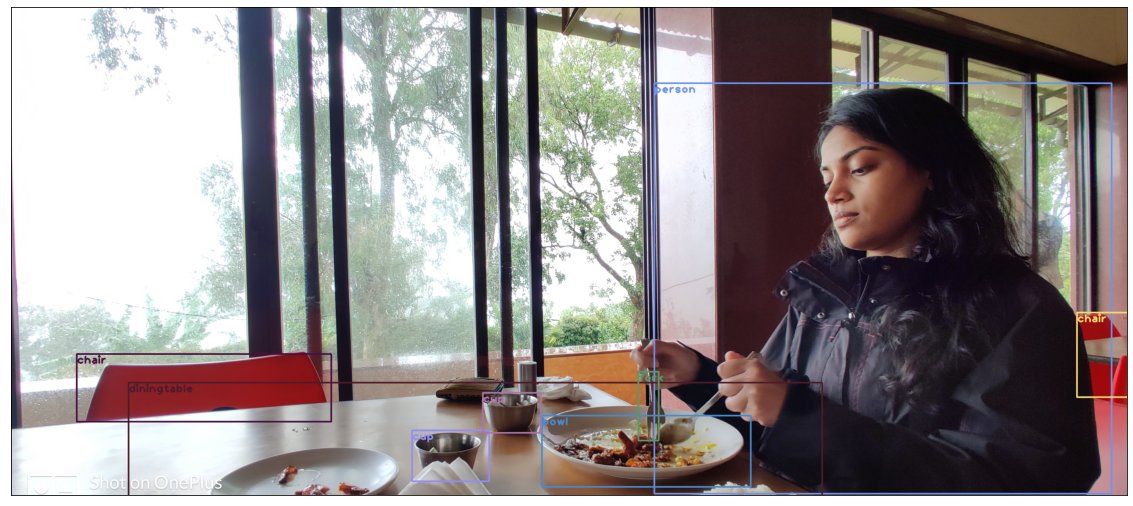

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

yolov3weights_path = "yolov3.weights"
yolov3_cfg_path = "yolov3.cfg"
coco_names_path = "coco.names"
img_path = "yolo_me_img.jpg"

# Load Yolo
net = cv2.dnn.readNet(yolov3weights_path, yolov3_cfg_path)
classes = []
with open (coco_names_path, "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Loading image
img = cv2.imread(img_path)
#img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence >= 0.35:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.35, 0.4)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 5)
        cv2.putText(img, label, (x, y + 40), font, 3, color, 5)

# display and save image
plt.figure(figsize=(20,10))
plt.xticks([])
plt.yticks([])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("yolo_v3_opencv_annotated_img.jpg")

## Code tweaking for better results
---

1) After commenting the image resizing line, I observed better detection confidence score for each class.

2) I relaxed the confidence threshold from 0.5 to 0.35 as it resulted in more classes being identified.
